In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import spotipy
from dotenv import load_dotenv
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from spotipy.oauth2 import SpotifyClientCredentials

from music_analysis import REPO_ROOT

# 日本語フォントの設定
mpl.rcParams["font.family"] = "Hiragino Sans"

load_dotenv(REPO_ROOT / ".env")

True

In [3]:
from music_analysis.preprocess.retrieve import TrackRetriever
from music_analysis.preprocess.tables import TrackInfoTable

In [4]:
client_credentials_manager = SpotifyClientCredentials(
    os.environ["SPOTIPY_CLIENT_ID"], os.environ["SPOTIPY_CLIENT_SECRET"]
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
from dataclasses import dataclass


@dataclass
class PlayList:
    name: str
    id: str


pl_ids = [
    "37i9dQZF1DXdYLx5nkfC6h",  # 1990
    "37i9dQZF1DXe7O2FbHCVV7",  # 1995
    "37i9dQZF1DXbfiVy8TtVAi",  # 2000
    "37i9dQZF1DWTJ4WvMdD3FU",  # 2005
    "37i9dQZF1DX3sNFTJOmXxv",  # 2010
    "37i9dQZF1DWTMk3G0nyzbA",  # 2015
]
pl_names = ["1990", "1995", "2000", "2005", "2010", "2015"]
for name, id in zip(pl_names, pl_ids):
    play_list = PlayList(name=name, id=id)

In [6]:
track_retriever = TrackRetriever(sp)

track_info_df = []
for name, id in zip(pl_names, pl_ids):
    pl = PlayList(name=name, id=id)
    pl_trks = track_retriever.glob_playlist_tracks(pl.id)
    # NOTE: TEMP
    pl_trks = [track for track in pl_trks if track is not None]

    track_info_table = TrackInfoTable(sp=sp, tracks=pl_trks)
    df = track_info_table.get_track_info_df()
    df["年代"] = pl.name
    print(len(df))
    track_info_df.append(df)

track_info_df = pd.concat(track_info_df)
track_info_df

99
98
98
98
99
99


,トラックID,アーティストID,トラック名,アーティスト名,duration_ms,平均ラウドネス[dB],テンポ(BPM),拍子,キー,長短長,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,曲長[s],年代
0,5kdfBuQRbMUhQ6zATCFoTm,7lVG50DbbnbI4i1DgLxrLk,さよなら人類 ～シングルヴァージョン～,Tama,280160,-5.661,120.493,4,C,Major,0.566,0.517,0.0350,0.295000,0.000000,0.0989,0.632,280,1990
1,4lPEdvGVptFXUMk8DKMLnF,5lTGqFmlTng9jPrs7c2dRA,浪漫飛行,Kome Kome Club,246840,-11.854,137.213,4,B,Major,0.708,0.649,0.0312,0.117000,0.005150,0.1450,0.969,246,1990
2,0VautPaGJuzwHMo945JvLa,7i9bNUSGORP5MIgrii3cJc,太陽のKomachi Angel,B'z,249273,-4.211,120.820,4,G,Major,0.665,0.964,0.0404,0.000219,0.000002,0.1350,0.790,249,1990
3,5Nc3OwtzaQdeyEFMb31YCW,1fwyrDSLYLNCWHRv3Siyd7,今すぐＫｉｓｓ Ｍｅ,LINDBERG,237040,-9.774,170.771,4,E,Major,0.480,0.796,0.0496,0.013000,0.000000,0.1130,0.918,237,1990
4,4GAAXyEODRSDdtLHwe6A5s,2fpbR8VQWHUivTaeLTR5MJ,OH YEAH !,PRINCESS PRINCESS,249107,-6.438,142.800,4,A,Major,0.636,0.933,0.0459,0.075900,0.000000,0.0800,0.582,249,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1FV0rV6GEDsQd3sM8risYX,6nS5roXSAGhTGr34W6n7Et,Holding On - Radio Edit,Disclosure,211080,-5.123,124.044,4,D,Minor,0.742,0.820,0.2120,0.114000,0.000124,0.1350,0.854,211,2015
95,1KcnJTiXJXAqW5bB7zpkBC,4D75GcNG95ebPtNvoNVXhz,SummerThing!,AFROJACK,235344,-5.463,130.036,4,C,Major,0.707,0.782,0.0613,0.054100,0.000000,0.2970,0.790,235,2015
96,2vzn8usBcuNL93DnTjEK0z,4Kxlr1PRlDKEB0ekOCyHgX,LOSER,BIGBANG,219371,-4.127,89.846,4,D♯/E♭,Major,0.639,0.692,0.1070,0.338000,0.000000,0.3560,0.488,219,2015
97,5CchV8Rh5s2sJ377bUP52Y,0bAsR2unSRpn6BQPEnNlZm,Brave Shine,Aimer,233973,-5.419,171.123,4,G♯/A♭,Major,0.345,0.881,0.0828,0.000711,0.000003,0.1730,0.525,233,2015


<Axes: xlabel='年代'>

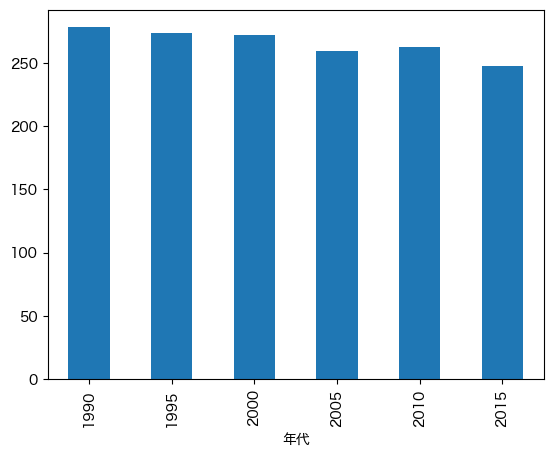

In [8]:
track_info_df.groupby("年代")["曲長[s]"].mean().plot.bar()

<Axes: xlabel='曲長[s]', ylabel='Count'>

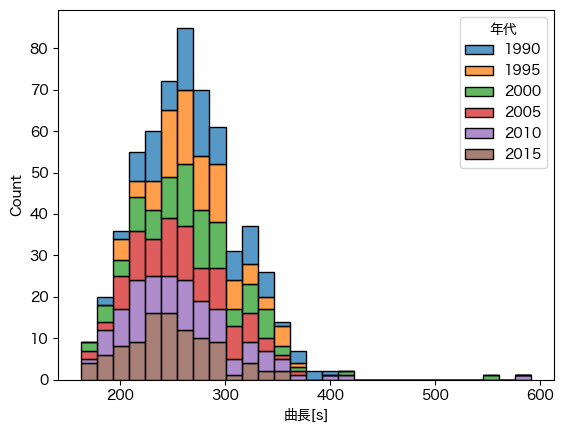

In [9]:
sns.histplot(
    track_info_df,
    x="曲長[s]",
    hue="年代",
    multiple="stack",
)

In [10]:
cols = [
    # "曲長[ms]",
    "平均ラウドネス[dB]",
    "テンポ(BPM)",
    "拍子",
    # "キー",
    # "長短長",
    "danceability",
    "energy",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]

In [11]:
# X_reduced = PCA(n_components=2).fit_transform(track_info_df[cols].values)
X_reduced = TSNE(n_components=2).fit_transform(track_info_df[cols].values)

print(X_reduced.shape)

(591, 2)


In [23]:
Y = pd.DataFrame(X_reduced, columns=["第一主成分", "第二主成分"])
Y["年代"] = track_info_df["年代"].values
Y["アーティスト名"] = track_info_df["アーティスト名"].values
Y["トラック名"] = track_info_df["トラック名"].values
Y

,第一主成分,第二主成分,年代,アーティスト名,トラック名
0,-1.443550,-4.076618,1990,Tama,さよなら人類 ～シングルヴァージョン～
1,25.098665,1.813970,1990,Kome Kome Club,浪漫飛行
2,-1.497011,-6.930953,1990,B'z,太陽のKomachi Angel
3,51.917095,1.939525,1990,LINDBERG,今すぐＫｉｓｓ Ｍｅ
4,30.315910,0.376845,1990,PRINCESS PRINCESS,OH YEAH !
...,...,...,...,...,...
586,6.459719,-5.508314,2015,Disclosure,Holding On - Radio Edit
587,16.023043,-4.696445,2015,AFROJACK,SummerThing!
588,-43.577263,3.746330,2015,BIGBANG,LOSER
589,51.398659,3.480155,2015,Aimer,Brave Shine


<Axes: xlabel='第一主成分', ylabel='第二主成分'>

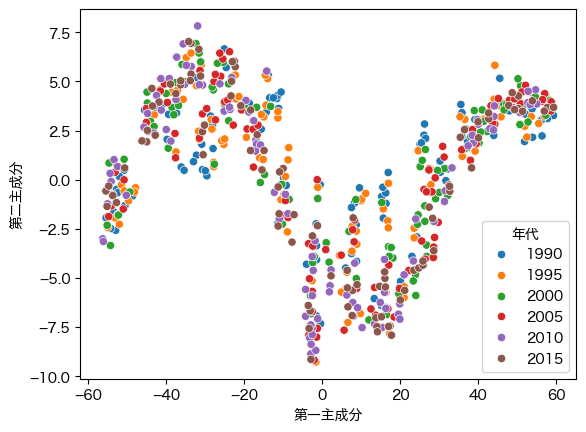

In [24]:
sns.scatterplot(data=Y, x="第一主成分", y="第二主成分", hue="年代")

In [25]:
import plotly.express as px
import plotly.graph_objects as go

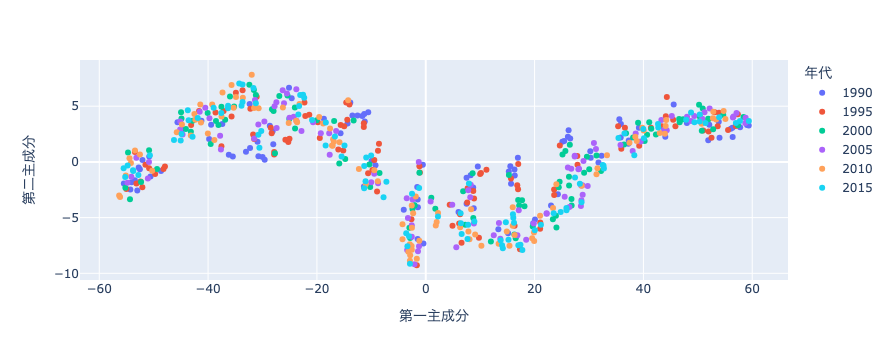

In [26]:
px.scatter(
    Y,
    x="第一主成分",
    y="第二主成分",
    hover_name="年代",
    hover_data=["アーティスト名", "トラック名"],
    color="年代",
)